# Gradient Descent

Gradient descent is an optimization algorithm which finds the minimum of a function with an iterative method: 
$$w_{k+1} = w_k - \alpha \nabla f(w_k)$$

In our case of linear regression, we apply the gradient descent in the following way: 
$$w \leftarrow w - \alpha \frac{\partial J(w,b)}{\partial w}$$
$$b \leftarrow b- \alpha \frac{\partial J(w,b)}{ \partial b}$$
where $\alpha$ is the learning rate or time step.

The partial derivatives will have the following values for linear regression:
$$\frac{\partial J(w,b)}{\partial w} = \dfrac{1}{m}\sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})(x^{(i)})$$
$$\frac{\partial J(w,b)}{\partial b} = \dfrac{1}{m}\sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) $$

**NOTE:** Partial derivative must be calculated before updating any parameters.

---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def lin_reg(x,w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i]+b
    return f_wb

The cost function for linear regression:

In [3]:
def cost_lin_reg(x,y,w,b):
    """
    Cost function for Linear regression
    Arguments:
    x : ndarray, input variable
    y : ndarray, output variable/target variable
    w, b  : parameters for the model
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    cost=0
    for i in range(m):
        f_wb[i]= w*x[i]+b
        cost = cost + (f_wb[i]-y[i])**2
    return (1/(2*m))*cost

Below function is to calculate partial derivatives:

In [4]:
def pdv_linreg(x,y,w,b):
    """
    Computes the partial derivatives in gradient descent algorithm for linear regression
    Arguments:
    x : ndarray, input variable
    y : ndarray, output variable/target variable
    w, b  : parameters for the model
    
    Output:
    dj_dw, dj_db : Partial derivatives of cost function wrt w and b
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_temp = (f_wb - y[i])*x[i]
        dj_db_temp = (f_wb - y[i])
        
        dj_dw = dj_dw + dj_dw_temp
        dj_db = dj_db + dj_dw_temp
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw,dj_db

In [5]:
def grad_desc_linreg(x, y, w_in, b_in, alpha, num):
    """
    Compute gradient descent for parameters w,b of linear regression
    Arguments:
    x : (ndarray), input variable
    y : (ndarray), output variable/target variable
    w_in, b_in  : initial value of parameters for the model
    alpha : (float), Learning rate 
    num : (int), number of iterations
    
    Output:
    w : value of parameter after gradient descent
    b : value of parameter after gradient descent
    J_hist : (list), cost values list
    p_hist : (list), parameters values [w,b]
    """
    w = w_in
    b = b_in
    J_hist = []
    p_hist = []
    
    for i in range(num):
        dj_dw,dj_db = pdv_linreg(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<1000:
            J_hist.append(cost_lin_reg(x,y,w,b))
            p_hist.append([w,b])
    
    return w,b,J_hist,p_hist

---

In [6]:
x_train1 = np.array([1.0, 2.0])   #features
y_train1 = np.array([300.0, 500.0])   #target value

In [7]:
w_initial1 = 0
b_initial1 = 0
num1 = 100
alpha1 = 0.01

In [9]:
w1 , b1, J_values1 , p_values1 = grad_desc_linreg(x_train1,y_train1,w_initial1,b_initial1,alpha1,num1)

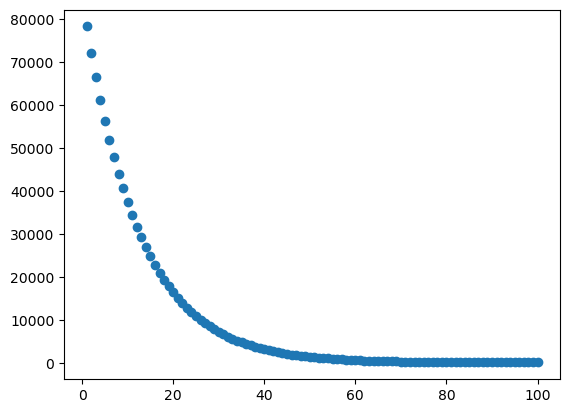

In [10]:
plt.scatter(x=np.arange(1,101),y=J_values1)

In [11]:
f_wb1 = lin_reg(x_train1,w1,b1)

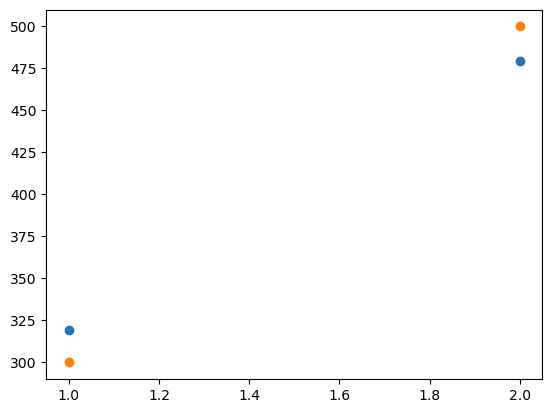

In [12]:
plt.scatter(x=x_train1,y=f_wb1)
plt.scatter(x=x_train1,y=y_train1)

---

In [13]:
df = pd.read_csv("copy-demographic-data.csv")
x_train2 = np.array(df["Birth rate"])
y_train2 = np.array(df["Internet users"])

w_initial2 = 0
b_initial2 = 80
num2 = 10000
alpha2 = 0.001
w2 , b2, J_values2 , p_values2 = grad_desc_linreg(x_train2,y_train2,w_initial2,b_initial2,alpha2,num2)

In [14]:
w2,b2

(-1.7903199432643029, 78.20968005673568)

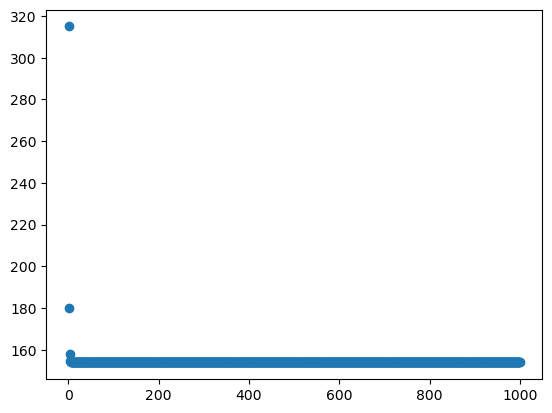

In [15]:
plt.scatter(x=np.arange(1,1001),y=J_values2)

In [16]:
f_wb2 = lin_reg(x_train2,w2,b2)

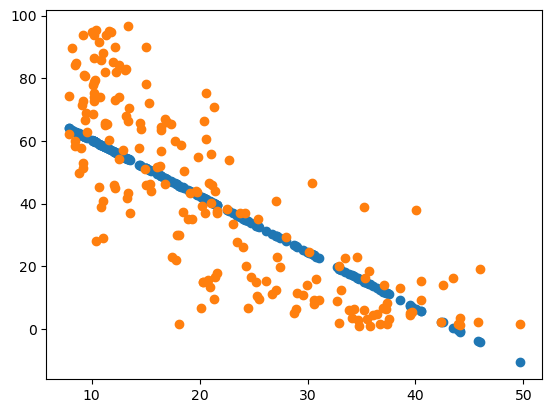

In [17]:
plt.scatter(x=x_train2,y=f_wb2)
plt.scatter(x=x_train2,y=y_train2)